# LinReg

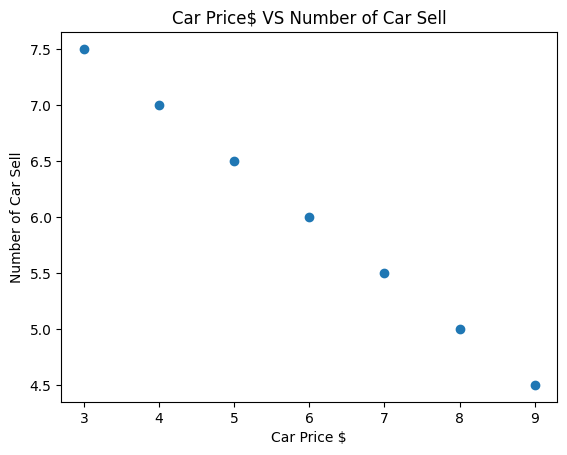

In [ ]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))


import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [ ]:
np.array(car_prices_array,dtype=np.float32).reshape(-1,1)

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [ ]:
'''

Create class

define model

MSE

Optimization

training_loop



'''

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#      create class



class LinReg(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinReg, self).__init__()
        #linear function
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)    

In [ ]:
#      define model

input_dim = 1
output_dim = 1
model = LinReg(input_dim, output_dim)

In [ ]:
#      MSE

mse = nn.MSELoss()

In [ ]:
#         Optimization


learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#    training_loop


loss_list = []
iteration_number = 1001

for iteration in range(iteration_number):
    
    optimizer.zero_grad()

    results = model(car_price_tensor)
    loss = mse(results, number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)

    if(iteration % 50 ==0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 49.51255416870117
epoch 50, loss 4.559309482574463
epoch 100, loss 3.0809166431427
epoch 150, loss 2.081904649734497
epoch 200, loss 1.4068297147750854
epoch 250, loss 0.9506534337997437
epoch 300, loss 0.6423963904380798
epoch 350, loss 0.4340938925743103
epoch 400, loss 0.29333558678627014
epoch 450, loss 0.19821952283382416
epoch 500, loss 0.13394509255886078
epoch 550, loss 0.0905124619603157
epoch 600, loss 0.061163246631622314
epoch 650, loss 0.04133031144738197
epoch 700, loss 0.02792835794389248
epoch 750, loss 0.01887233555316925
epoch 800, loss 0.012752817012369633
epoch 850, loss 0.008617646060883999
epoch 900, loss 0.005823430139571428
epoch 950, loss 0.003935118205845356
epoch 1000, loss 0.0026592158246785402


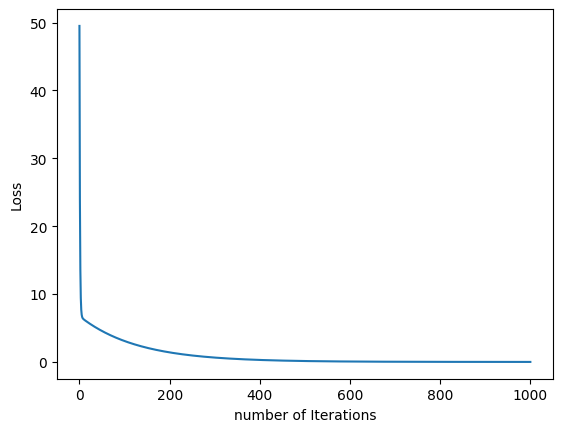

In [ ]:
plt.plot(range(iteration_number), loss_list)
plt.xlabel("number of Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
model(car_price_tensor)

tensor([[7.4108],
        [6.9353],
        [6.4597],
        [5.9841],
        [5.5085],
        [5.0330],
        [4.5574]], grad_fn=<AddmmBackward0>)

In [ ]:
model(car_price_tensor).data

tensor([[7.4108],
        [6.9353],
        [6.4597],
        [5.9841],
        [5.5085],
        [5.0330],
        [4.5574]])

In [ ]:
model(car_price_tensor).data.numpy()

array([[7.4108434],
       [6.9352674],
       [6.4596915],
       [5.9841156],
       [5.5085397],
       [5.0329638],
       [4.557388 ]], dtype=float32)

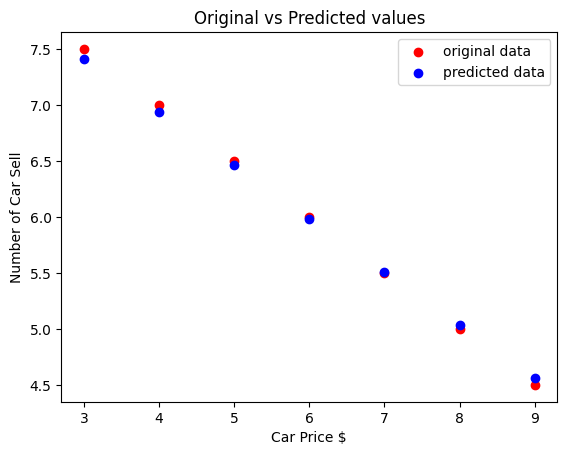

In [ ]:
predicted = model(car_price_tensor).data.numpy()

plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()